<a href="https://colab.research.google.com/github/Yuns-u/Codestates_Project/blob/main/n233a_feature_importances_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 3*

# 📝 Assignment
---
# Feature Importances

### 1) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
- 작성한 코드마다 적절한 코멘트를 추가하세요
- 모델을 학습시키고 베이스라인 모델과 비교해 보세요
- **포트폴리오 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명하여 과제 제출폼에 제출하세요.** 

In [10]:
pip install category_encoders

In [11]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#plt.show를 하지 않아도 된다.

# 사이킷런 - 데이터셋 나누기
from sklearn.model_selection import train_test_split

# 사이킷런 - encoders, imputers
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

# 사이킷런 - pipeline
from sklearn.pipeline import make_pipeline

# 사이킷런 - 학습모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge


# 사이킷런 - 모델 평가지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/N23X/water_potability.csv')

In [14]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [65]:
#임의로 결측치 처리

df = df.dropna()

In [66]:
#타겟과 특성
target = 'Potability'
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [67]:
#데이터 나누기
train, test = train_test_split(df, train_size=0.80, test_size=0.20,
                               stratify=df[target], random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                               stratify=train[target], random_state=2)

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train = train[features]
X_val = val[features]
X_test = test[features]

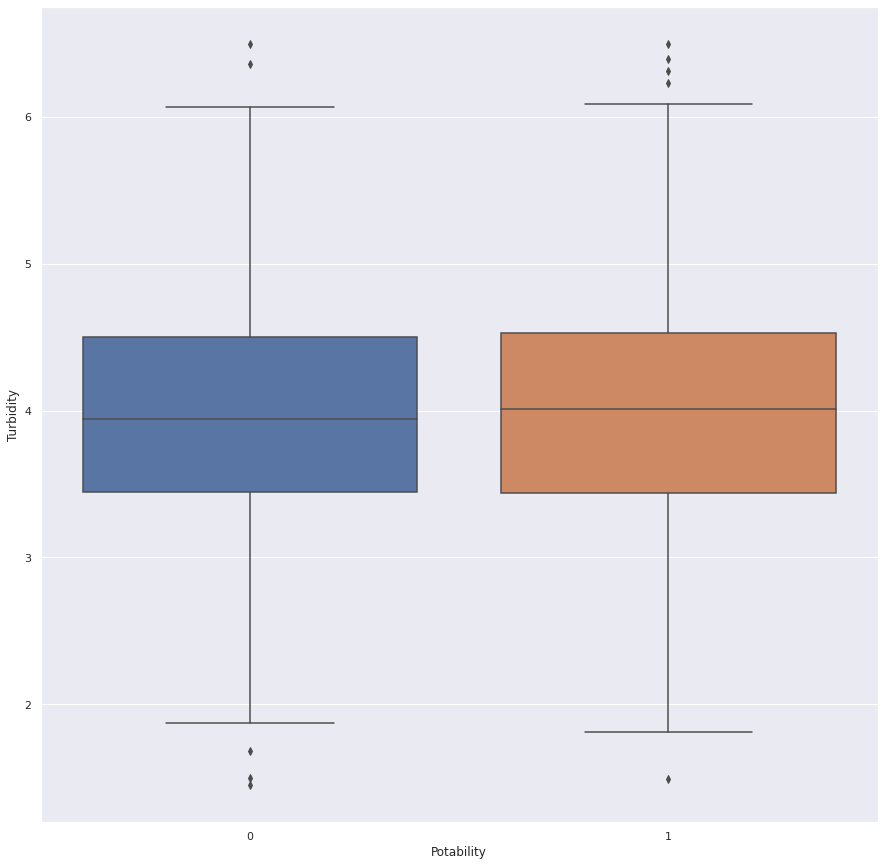

In [68]:
# Turbidity 박스플롯
sns.boxplot(x=target, y='Turbidity', data=df)

In [69]:
#Turbidity의 분포
df['Turbidity'].describe()

count    2011.000000
mean        3.969729
std         0.780346
min         1.450000
25%         3.442915
50%         3.968177
75%         4.514175
max         6.494749
Name: Turbidity, dtype: float64

In [70]:
##Turbidity의 분포도
#sns.countplot(data=df['Turbidity'])
df['Turbidity']

3       4.628771
4       4.075075
5       2.559708
6       2.672989
7       4.401425
          ...   
3267    4.613843
3268    3.442983
3269    4.369264
3270    3.669712
3271    4.435821
Name: Turbidity, Length: 2011, dtype: float64

탁도 측정방법은 기기분석법과 육안법이 있다. 기기분석법은 혼탁입자들에 의하여 산란도를 측정하는 네펠로법(Nephelometry)을 이용하는 것으로 네펠로법-혼탁도-단위(Nephelometry Turbidity Unit ; NTU)를 사용한다. 0∼40의 범위로 나타낼 수 있으며 한국의 경우 음용수는 1 NTU 이하라고 한다.

 물은 탁도가 높으면 폐수에 의한 오염가능성이 있을 뿐만 아니라, 많은 병원 미생물이 이 입자들에 의해 둘러싸여 소독제로 부터 보호되어 수인성 전염병의 우려가 있다.

In [71]:
mean_group = df.groupby('Potability').mean()
mean_group

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181
1,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254


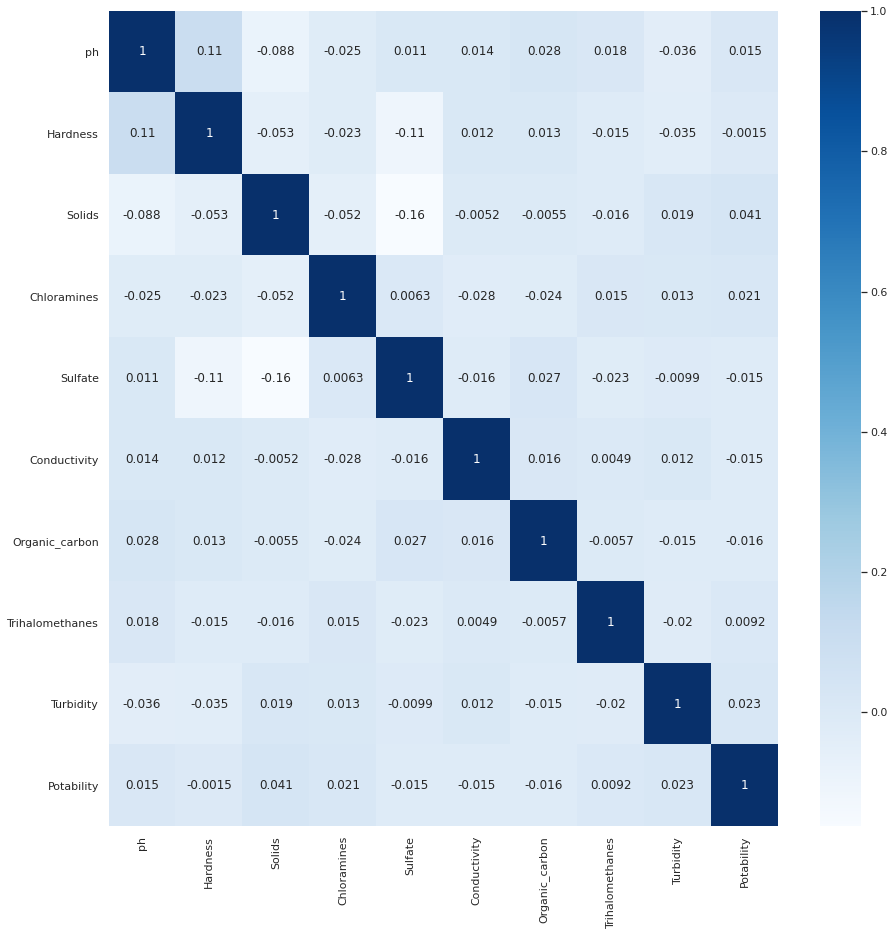

In [72]:
#feature들 간의 상관관계를 살펴본다.
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True ,cmap="Blues")
sns.set(rc={'figure.figsize':(15,15)})

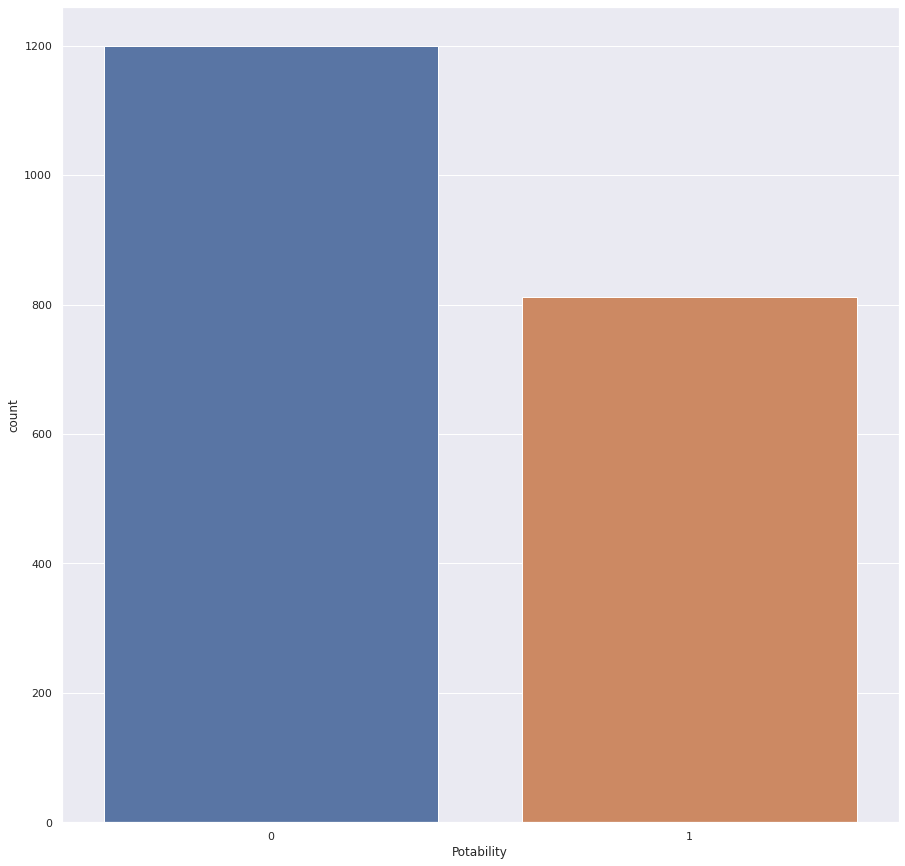

In [73]:
sns.countplot(data=df, x='Potability')
#기준모델은 0, 마실 수 없다.

In [74]:
percent_non_potable = len(df_pot_0)/ len(df)
print('The percentage of non potable water is: {}%'.format(round(percent_non_potable * 100,4)))

The percentage of non potable water is: 99.3536%


In [75]:
#데이터셋 분리
target = 'Potability'

train, test = train_test_split(df, test_size=0.2, 
                              stratify = df[target], random_state=2)

train, val = train_test_split(train, test_size=0.2, 
                              stratify = train[target], random_state=2)

In [76]:
y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns=target)

In [77]:
#데이터 학습
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, random_state=2, n_jobs=-1)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.6614906832298136


In [78]:
y_pred_test = pipe.predict(X_test)
print('테스트 정확도: ', accuracy_score(y_test, y_pred_test))

테스트 정확도:  0.7096774193548387


In [ ]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###

#포트폴리오 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명하기

#답: 베이스라인 모델은 마실 수 없는 물의 빈도수로 60.989%의 성능을 보인다.

### 2) Xgboost를 사용해 학습하고 기존 모델과 비교해 보세요.
- 본인 포트폴리오 데이터를 Xgboost로 학습하여 기존에 만들었던 모델과 비교합니다.
- **breast cancer 데이터를 Xgboost로 학습하고 f1 score를 제출하세요.(test 데이터에서 0.95이상)**

In [79]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 
from xgboost import XGBClassifier

pipe_xgboost = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=1000
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_xgboost.fit(X_train, y_train);
y_pred = pipe_xgboost.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.5962732919254659


In [80]:
y_pred_test = pipe_xgboost.predict(X_test)
print('테스트 정확도: ', accuracy_score(y_test, y_pred_test))

테스트 정확도:  0.6699751861042184


In [ ]:
# xgboost를 사용한 모델의 성능이 더 낮다.

In [81]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

cancer_dataset = load_breast_cancer()

features = cancer_dataset.data
target = cancer_dataset.target
df_b = pd.DataFrame(data=features, columns=cancer_dataset.feature_names)
df_b['target'] = target

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features, target, test_size=0.2, random_state=2)
print(X_train_b.shape, X_test_b.shape)

(455, 30) (114, 30)


In [82]:
pipe_xgboost = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_xgboost.fit(X_train_b, y_train_b);

In [83]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_pred_b = pipe_xgboost.predict(X_test_b)
print('test accuracy: ', accuracy_score(y_test_b, y_pred_b))

print(classification_report(y_pred_b, y_test_b))

print('f1 score: ', f1_score(y_test_b, y_pred_b))

test accuracy:  0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.96      0.97      0.96        68

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

f1 score:  0.9635036496350365


### 3) Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요
- 본인 포트폴리오 데이터를 사용해 만든 모델의 Permutation importances를 계산하세요.
- **breast cancer 데이터를 사용해 만든 모델의 Permutation importances를 계산하고 가장 높은 값을 가지는 특성의 이름을 과제 제출폼에 제출하세요.**
    - eli5 PermutationImportance 사용
    - scoring = 'accuracy'
    - n_iter = 5
    - random_state = 2

In [34]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 
!pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [84]:
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, random_state=2, n_jobs=-1)
)

pipe.fit(X_train, y_train)

pipe.named_steps

{'ordinalencoder': OrdinalEncoder(cols=[], drop_invariant=False, handle_missing='value',
                handle_unknown='value', mapping=[], return_df=True, verbose=0),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                        warm_start=False),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0)}

In [85]:
permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'],
    scoring = 'accuracy',
    n_iter = 5,
    random_state = 2
)

In [88]:
X_val_transformed = pipe.named_steps['ordinalencoder'].transform(X_val)

permuter.fit(X_val_transformed, y_val)
#결측치가 있으면 오류가 난다.

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [92]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

pd.Series(permuter.feature_importances_,features).sort_values()

Turbidity          0.001242
Organic_carbon     0.009317
Conductivity       0.009317
Trihalomethanes    0.012422
Chloramines        0.016770
Hardness           0.024224
Solids             0.033540
ph                 0.054037
Sulfate            0.097516
dtype: float64

In [60]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_xgboost.named_steps['xgbclassifier'],
    scoring = 'accuracy',
    n_iter = 5,
    random_state = 2
)

# permuter 계산은 preprocessing 된 X_val을 사용.
X_test_transformed_b = pipe_xgboost.named_steps['ordinalencoder'].transform(X_test_b)

# 스코어를 다시 계산.
permuter.fit(X_test_transformed_b, y_test_b);

In [62]:
feature_names = cancer_dataset.feature_names.tolist()
pd.Series(permuter.feature_importances_,feature_names).sort_values()

mean radius                0.000000
worst compactness          0.000000
concave points error       0.000000
concavity error            0.000000
mean fractal dimension     0.000000
mean concavity             0.000000
smoothness error           0.000000
mean area                  0.000000
mean perimeter             0.000000
fractal dimension error    0.003509
mean compactness           0.005263
radius error               0.005263
mean texture               0.005263
worst concavity            0.008772
worst fractal dimension    0.008772
mean symmetry              0.010526
worst radius               0.012281
area error                 0.012281
worst symmetry             0.012281
symmetry error             0.014035
perimeter error            0.015789
worst concave points       0.015789
worst area                 0.017544
worst smoothness           0.017544
texture error              0.017544
worst perimeter            0.019298
mean concave points        0.019298
compactness error          0

In [63]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = feature_names
)

Weight,Feature
0.0351 ± 0.0222,mean smoothness
0.0351 ± 0.0111,worst texture
0.0211 ± 0.0140,compactness error
0.0193 ± 0.0131,mean concave points
0.0193 ± 0.0131,worst perimeter
0.0175 ± 0.0111,texture error
0.0175 ± 0.0111,worst smoothness
0.0175 ± 0.0400,worst area
0.0158 ± 0.0233,worst concave points
0.0158 ± 0.0131,perimeter error


## 🔥 도전과제

### 4) Xgboost 외에 다른 부스팅 라이브러리로 모델을 학습시켜 Xgboost와 비교해 보세요.

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train_b, y_train_b)
 
# Predict the response for test dataset
y_pred_b = model.predict(X_test_b)
 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_b, y_pred_b))


#xgboost가 더 정확하다.

Accuracy: 0.9473684210526315
